In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import wiener
import os
import scipy

In [3]:
def load_image(image_path):
    return cv2.imread(image_path)

def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis(False)
    plt.show()

def adjust_brightness_contrast(image, alpha, beta):
    return cv2.addWeighted(image, alpha, image, 0, beta)

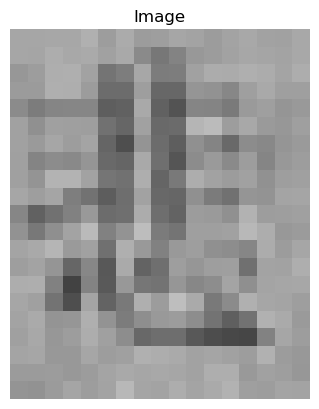

In [63]:
img_path = '/home/mhtuan/university/hk2_3/xla/wb_recognition_dataset/train/489/nlvnpf-0174-03-003_crop_6.jpg'
blurred_img = load_image(img_path)
blurred_img = cv2.cvtColor(blurred_img,cv2.COLOR_BGR2GRAY)
display_image(blurred_img)

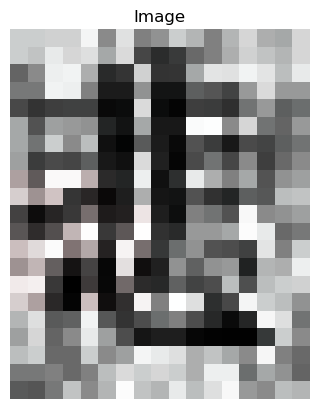

In [64]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

def enhance_adapt(image, block_size=19, constant=17, method=cv2.ADAPTIVE_THRESH_GAUSSIAN_C):
    gray = image
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    th = cv2.adaptiveThreshold(gray, 255, method, cv2.THRESH_BINARY, block_size, constant)
    return th

def equalize_this(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq

finale = equalize_this(image_file=img_path, with_plot=False)
# enhanced1 = enhance_adapt(finale, 71, 22, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
# print(finale)
display_image(finale)

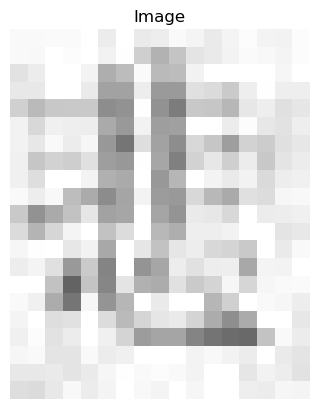

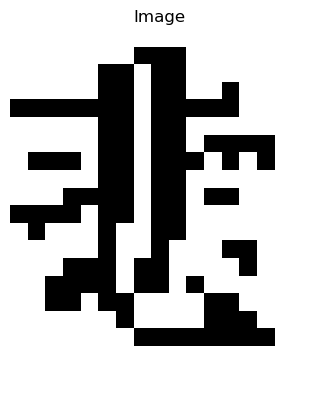

In [74]:
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

manual_result = cv2.convertScaleAbs(blurred_img, alpha=alpha, beta=beta)
display_image(manual_result)
enhanced1 = enhance_adapt(manual_result, 71, 22, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
display_image(enhanced1)